In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import os
import pickle
sbn.set_context(font_scale=2)

In [2]:
#Load Experiencing sample dataset
with open('./All_clean_data/EXPERIENCING_SAMPLE_R00_DND.pickle', 'rb') as handle:
    expdf = pickle.load(handle)

In [29]:
#Load Survey dataset - Only R for the moment
with open('./Clean Data R00/SURVEY_DF.pickle', 'rb') as handle:
    surveydf = pickle.load(handle)
avidf = surveydf['AVI']
avidf.head()

,index,Subject,Actually Feel: Enthusiastic,Actual HAP,Actually Feel: Dull,Actual LAN,Actually Feel: Excited,Actual HAP.1,Actually Feel: Sleepy,Actual LAN.1,...,HAN_actual,HA_actual,HAP_ideal,P_ideal,LAP_actual.1,LA_ideal,LAN_ideal,N_ideal,HAN_ideal,HA_ideal
1,1,1002,H,3.0,A,2.0,M,4.0,A,2.0,...,2.000000,2.000000,4.0,5.000000,4.8,2.0,1.0,1.000000,1.000000,3.333333
3,3,1004,H,3.0,A,2.0,M,4.0,H,3.0,...,1.333333,2.666667,4.4,4.333333,4.0,2.2,2.0,1.333333,1.666667,3.333333
7,7,1008,H,3.0,A,2.0,H,3.0,A,2.0,...,1.666667,2.000000,3.2,5.000000,4.0,2.0,1.0,1.000000,1.000000,2.000000
8,8,1009,M,4.0,A,2.0,M,4.0,A,2.0,...,1.333333,2.333333,3.8,3.666667,3.4,2.4,2.0,2.000000,1.666667,2.666667
13,13,1014,M,4.0,N,1.0,H,3.0,A,2.0,...,1.666667,2.333333,3.8,4.000000,4.2,1.4,1.0,1.000000,1.333333,2.333333


In [8]:
#Select all the subjects in R00
R00_subjects = avidf['Subject'].unique()

In [23]:
#Filter R00 subjects in the Experiencing Sample Dataset
###Sanity checks
len(expdf.loc[expdf.subject.isin(R00_subjects.astype(str)),:]['subject'].unique()) == len(R00_subjects)

True

In [26]:
set.difference(set(expdf.loc[expdf.subject.isin(R00_subjects.astype(str)),:]['subject'].unique()),set(R00_subjects.astype(str)))

set()

In [27]:
#It seems that everything is ok.
R00_exp = expdf.loc[expdf.subject.isin(R00_subjects.astype(str)),:].copy()

In [30]:
R00_exp.head()

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,start_survey,survey_no,experiment,DATE
0,1047,2.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,2016-02-19 13:49:36,1,R00,0219
1,1047,2.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,2016-02-20 07:32:33,2,R00,0220
2,1047,3.0,3.0,1.0,1.0,3.0,5.0,1.0,1.0,2016-02-20 15:39:23,3,R00,0220
3,1047,4.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,2016-02-20 21:13:34,4,R00,0220
4,1047,4.0,1.0,1.0,2.0,4.0,2.0,1.0,1.0,2016-02-21 07:11:48,5,R00,0221


---
### Work around Exp sample
---

In [36]:
#We need to average the exp sample answers by subject in order to correlate with the delta VIS
R00_by_subj = R00_exp.loc[:,'subject':'ha'].copy()
R00_by_subj_mean = R00_by_subj.groupby(by='subject',as_index= False).mean().copy() 
R00_by_subj_median = R00_by_subj.groupby(by='subject',as_index= False).median().copy() 

R00_by_subj_mean.head()

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha
0,1002,3.275862,4.655172,1.000000,1.724138,2.448276,4.689655,1.034483,1.000000
1,1004,2.150000,2.200000,1.200000,2.200000,1.900000,2.650000,1.350000,2.150000
2,1008,2.903226,1.548387,1.032258,2.193548,2.903226,3.064516,1.129032,1.096774
3,1009,3.781250,2.656250,1.000000,1.437500,2.406250,3.718750,1.000000,1.156250
4,1014,3.931034,2.862069,1.034483,1.137931,2.275862,4.172414,1.034483,1.034483


In [37]:
R00_by_subj_median.head()

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha
0,1002,3.0,5.0,1.0,2.0,2.0,5.0,1.0,1.0
1,1004,2.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0
2,1008,3.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0
3,1009,4.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0
4,1014,4.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0


----
## Work around AVI
---

In [111]:
print(list(avidf.columns))

['index', 'Subject', 'Actually Feel: Enthusiastic', 'Actual HAP', 'Actually Feel: Dull', 'Actual LAN', 'Actually Feel: Excited', 'Actual HAP.1', 'Actually Feel: Sleepy', 'Actual LAN.1', 'Actually Feel: Strong', 'Actual HAP.2', 'Actually Feel: Sluggish', 'Actual LAN.2', 'Actually Feel: Euphoric', 'Actual HAP.3', 'Actually Feel: Idle', 'Actual LA', 'Actually Feel: Aroused', 'Actual HA', 'Actually Feel: Rested', 'Actual LAP', 'Actually Feel: Astonished', 'Actual HA.1', 'Actually Feel: Quiet', 'Actual LA.1', 'Actually Feel: Surprised', 'Actual HA.2', 'Actually Feel: Still', 'Actual LA.2', 'Actually Feel: Passive', 'Actual LA.3', 'Actually Feel: Inactive', 'Actual LA.4', 'Actually Feel: Fearful', 'Actual HAN', 'Actually Feel: Calm', 'Actual LAP.1', 'Actually Feel: Hostile', 'Actual HAN.1', 'Actually Feel: Peaceful', 'Actual LAP.2', 'Actually Feel: Nervous', 'Actual HAN.2', 'Actually Feel: Relaxed', 'Actual LAP.3', 'Actually Feel: Elated', 'Actual HAP.4', 'Actually Feel: Lonely', 'Actual N',

In [49]:
#We have a problem LAP_actual.1 should be LAP_ideal. Let's make some changes:
avidf['Subject'] = avidf['Subject'].astype(str).copy()
avidf = avidf.rename(columns={'LAP_actual.1' : 'LAP_ideal'})

In [56]:
surveydf['AVI'] = avidf.copy()

In [57]:
#Let's save this changes to our pickle object

#with open('./Clean Data R00/SURVEY_DF.pickle','wb') as handle:
    #pickle.dump(surveydf, handle)

In [112]:
cols = ['HAP_actual','P_actual','LAP_actual','LA_actual','LAN_actual','N_actual','HAN_actual','HA_actual',
        'HAP_ideal','P_ideal','LAP_ideal','LA_ideal','LAN_ideal','N_ideal','HAN_ideal','HA_ideal']

### Let's calculate delta AVI

In [113]:
#Make a smaller DF for only subject and the avi data
small_avi = avidf.loc[:,['Subject', *cols]]

In [114]:
#calculate the AVI delta
deltas = ['HAP_delta','P_delta','LAP_delta','LA_delta','LAN_delta','N_delta','HAN_delta','HA_delta']
col = 1
for i in deltas:
    small_avi[i] = small_avi.iloc[:,col] - small_avi.iloc[:,col+8]   #actual - ideal
    col += 1

In [115]:
#checking
small_avi.loc[:,['Subject','LAP_actual', 'LAP_ideal', 'LAP_delta']].head(10)

,Subject,LAP_actual,LAP_ideal,LAP_delta
1,1002,3.8,4.8,-1.0
3,1004,2.2,4.0,-1.8
7,1008,2.2,4.0,-1.8
8,1009,3.0,3.4,-0.4
13,1014,3.8,4.2,-0.4
17,1018,2.4,4.4,-2.0
18,1019,2.0,3.8,-1.8
19,1020,3.0,4.0,-1.0
20,1021,2.6,4.8,-2.2
23,1024,4.2,4.4,-0.2


### Merging datasets

In [194]:
all_together = pd.merge(R00_by_subj_mean,small_avi,how = 'inner', left_on= 'subject', right_on= 'Subject')
all_together_median = pd.merge(R00_by_subj_median,small_avi,how = 'inner', left_on= 'subject', right_on= 'Subject')

In [117]:
#Sanity checks
all_together.shape[0] == small_avi.shape[0] == R00_by_subj_median.shape[0]

True

In [197]:
all_together= round(all_together,2)
all_together_median = round(all_together_median,2)
all_together_median.head()

,subject,la_p,ha_p,ha_n,la_n,la,p,n,ha,Subject,...,HAN_ideal,HA_ideal,HAP_delta,P_delta,LAP_delta,LA_delta,LAN_delta,N_delta,HAN_delta,HA_delta
0,1002,3.0,5.0,1.0,2.0,2.0,5.0,1.0,1.0,1002,...,1.00,3.33,-0.4,-1.00,-1.0,0.4,1.00,1.00,1.00,-1.33
1,1004,2.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,1004,...,1.67,3.33,-1.6,-1.33,-1.8,-0.2,0.33,0.67,-0.33,-0.67
2,1008,3.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0,1008,...,1.00,2.00,-1.0,-1.67,-1.8,0.0,1.00,0.67,0.67,0.00
3,1009,4.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,1009,...,1.67,2.67,0.0,0.00,-0.4,0.0,0.00,-0.33,-0.33,-0.33
4,1014,4.0,3.0,1.0,1.0,2.0,4.0,1.0,1.0,1014,...,1.33,2.33,-0.4,0.00,-0.4,0.0,0.67,0.67,0.33,0.00


---
### Let's plot
---

In [119]:
#deltas = ['HAP_delta','P_delta','LAP_delta','LA_delta','LAN_delta','N_delta','HAN_delta','HA_delta']
exp_cols = ['ha_p', 'p', 'la_p', 'la', 'la_n', 'n', 'ha_n','ha']

0 ('HAP_delta', 'ha_p')
1 ('P_delta', 'p')
2 ('LAP_delta', 'la_p')
3 ('LA_delta', 'la')
4 ('LAN_delta', 'la_n')
5 ('N_delta', 'n')
6 ('HAN_delta', 'ha_n')
7 ('HA_delta', 'ha')


Text(0.5, 1.03, 'Delta AVI ~ Emotional state reported (mean)')

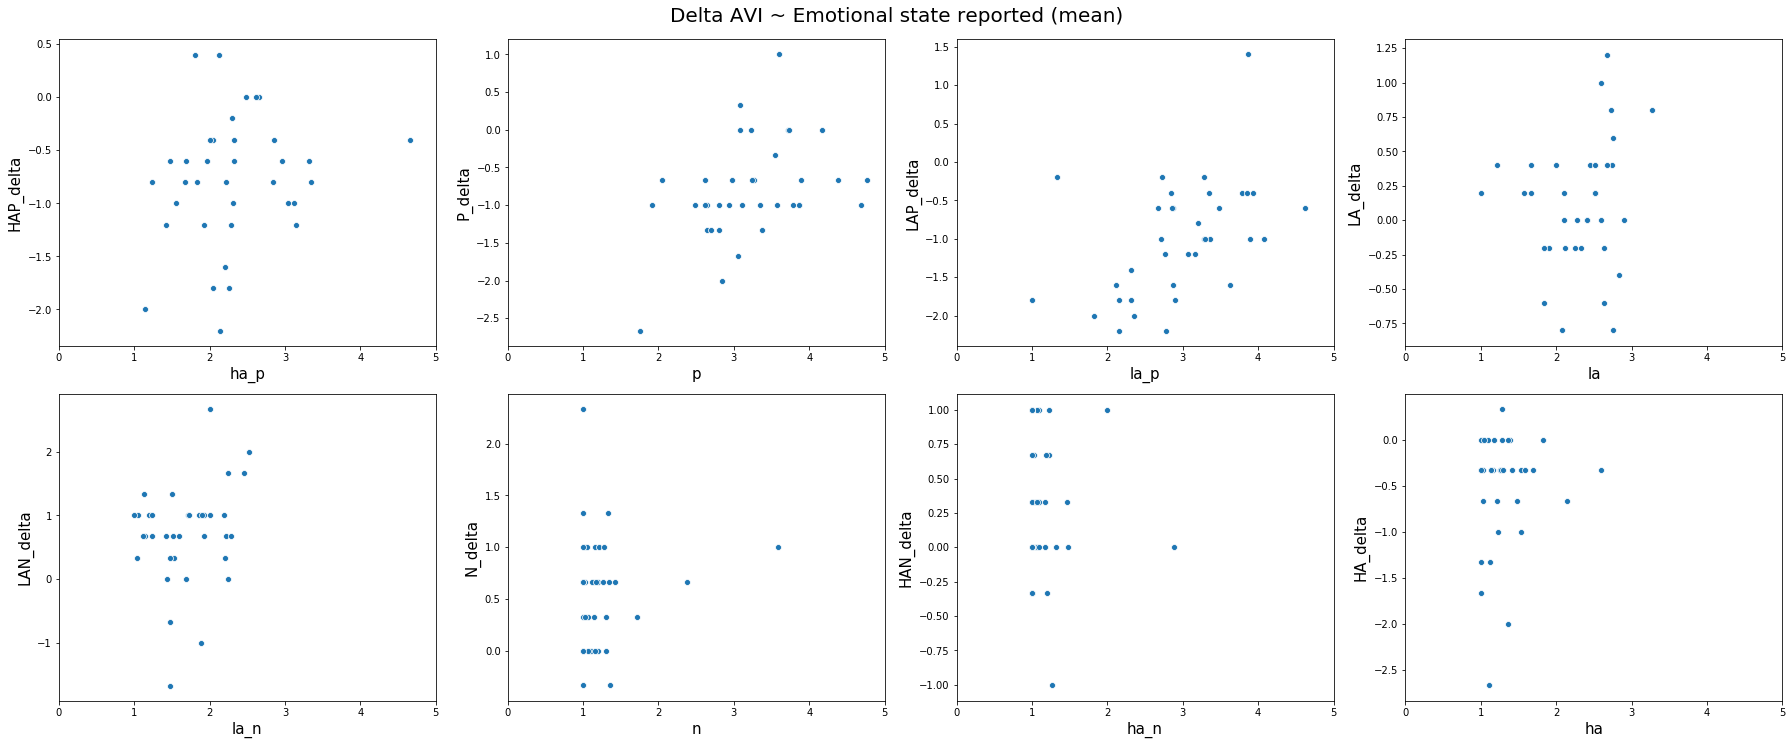

In [192]:
fig , ax = plt.subplots(2,4)
ax = ax.reshape(1,-1)[0].copy()
fig.set_size_inches(25,10)
fig.set_tight_layout('rect')

for n, c in enumerate(zip(deltas,exp_cols)):
    print(n,c)
    f = sbn.scatterplot(x = all_together.loc[:,c[1]], y = all_together.loc[:,c[0]], ax = ax[n])
    f.set_xlabel(ax[n].get_xlabel(), size= 15)
    f.set_ylabel(ax[n].get_ylabel(), size= 15)
    #f.set_xticklabels(f.get_xticks(), size= 15)
    #f.set_yticklabels(f.get_yticks(), size= 15)
    f.set_xlim(0,5)
plt.suptitle('Delta AVI ~ Emotional state reported (mean)', size = 20 , y = 1.03)

0 ('HAP_delta', 'ha_p')
1 ('P_delta', 'p')
2 ('LAP_delta', 'la_p')
3 ('LA_delta', 'la')
4 ('LAN_delta', 'la_n')
5 ('N_delta', 'n')
6 ('HAN_delta', 'ha_n')
7 ('HA_delta', 'ha')


Text(0.5, 1.03, 'Delta AVI ~ Emotional state reported (median)')

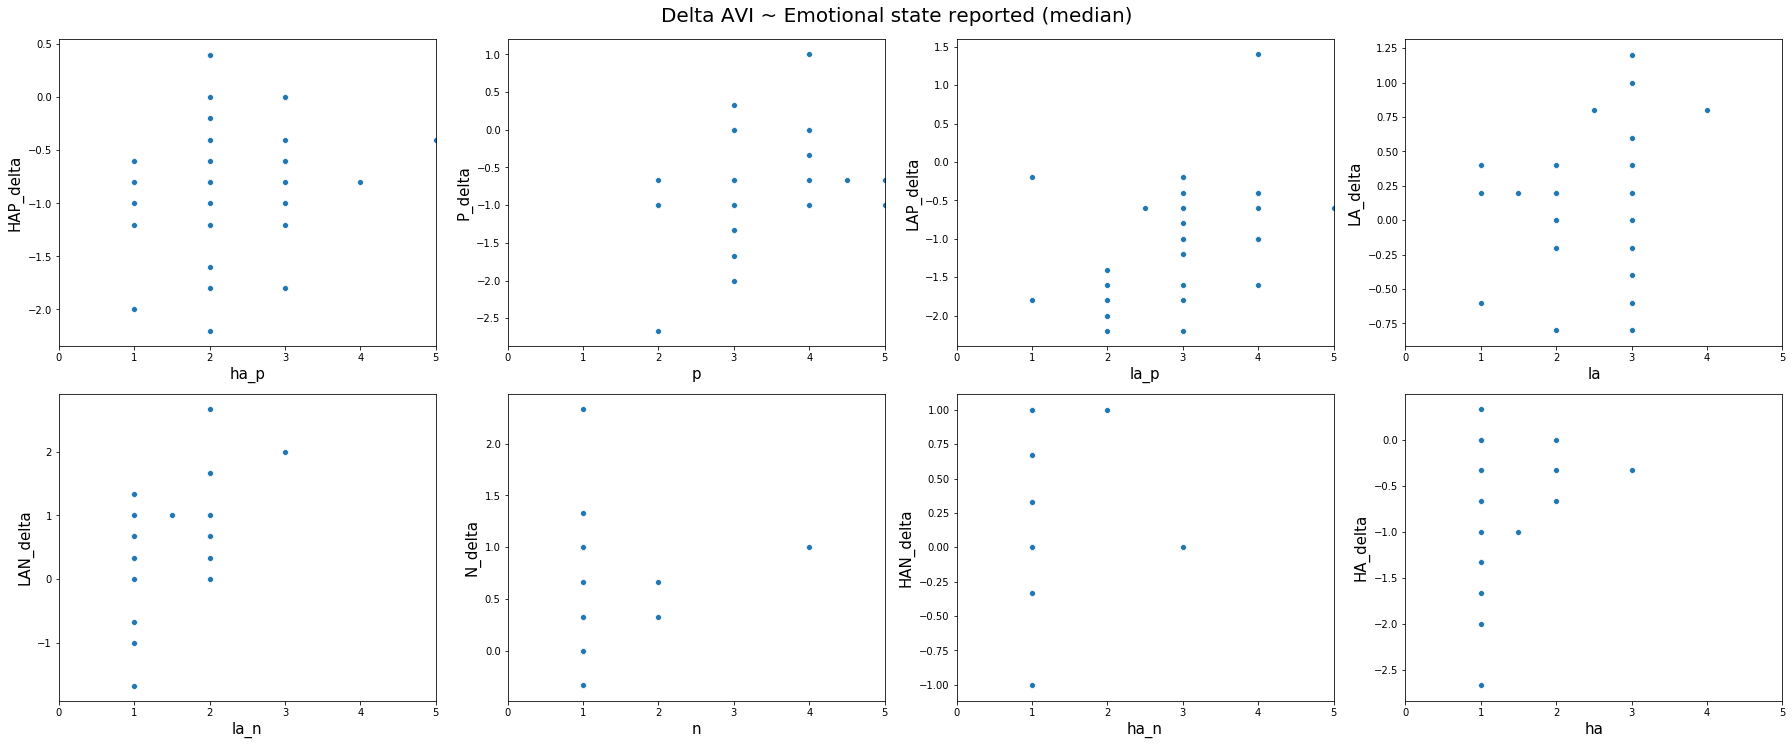

In [198]:
fig , ax = plt.subplots(2,4)
ax = ax.reshape(1,-1)[0].copy()
fig.set_size_inches(25,10)
fig.set_tight_layout('rect')

for n, c in enumerate(zip(deltas,exp_cols)):
    print(n,c)
    f = sbn.scatterplot(x = all_together_median.loc[:,c[1]], y = all_together_median.loc[:,c[0]], ax = ax[n])
    f.set_xlabel(ax[n].get_xlabel(), size= 15)
    f.set_ylabel(ax[n].get_ylabel(), size= 15)
    #f.set_xticklabels(f.get_xticks(), size= 15)
    #f.set_yticklabels(f.get_yticks(), size= 15)
    f.set_xlim(0,5)
plt.suptitle('Delta AVI ~ Emotional state reported (median)', size = 20 , y = 1.03)

In [199]:
#The plot with the median is ugly, let's use the mean from now 

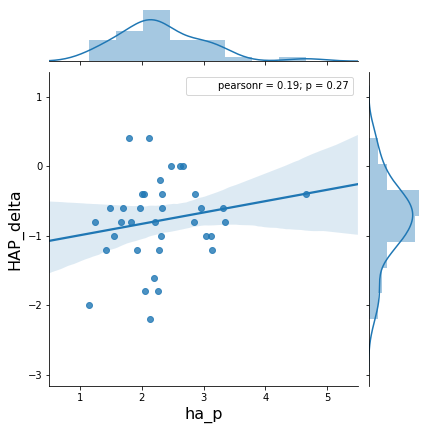

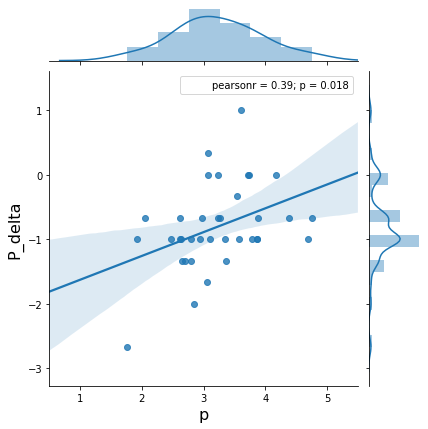

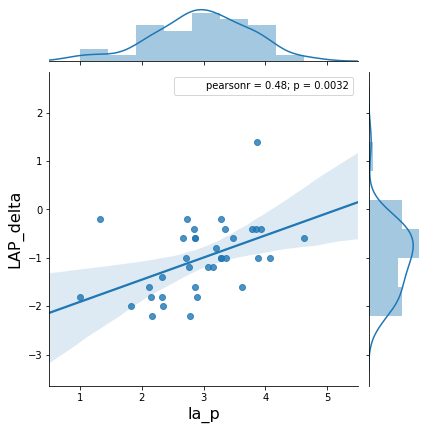

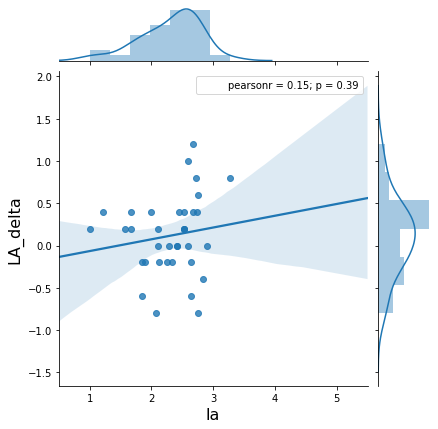

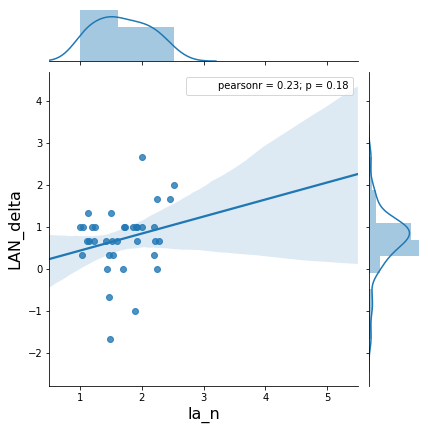

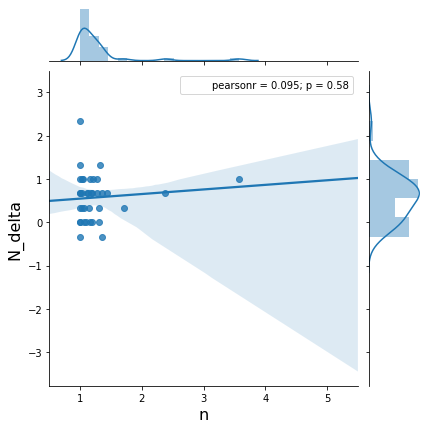

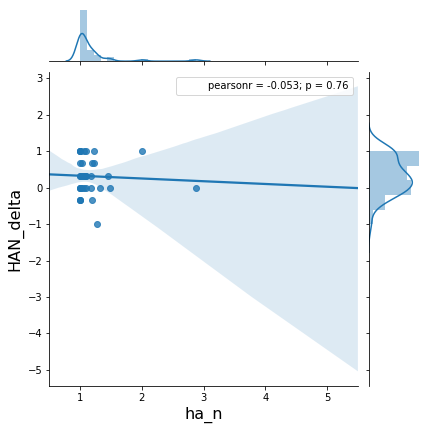

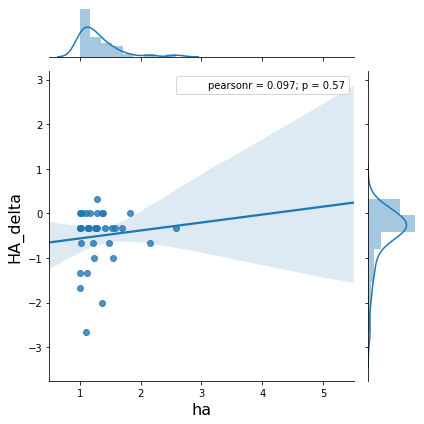

In [207]:
from scipy.stats import stats
from warnings import filterwarnings
filterwarnings('ignore')
for n, c in enumerate(zip(deltas,exp_cols)):
    fig = sbn.jointplot(x = all_together.loc[:,c[1]], y = all_together.loc[:,c[0]], kind = 'reg', xlim = [0.5,5.5]).annotate(stats.pearsonr) 
    fig.set_axis_labels(c[1] , c[0], fontsize=16)
plt.tight_layout()



In [202]:
dd